In [1]:
import token
import sys
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import double
from skimage import io
from PIL import Image
import colorsys

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=8000)

In [5]:
I1 = cv.imread('/content/drive/My Drive/DIP-ESE558/Project2/Food.png')
M,N,C = I1.shape
I2 = cv.cvtColor(I1,cv.COLOR_RGB2GRAY)
#Normalise the values , values are normalized to improve the computations
#computations in cases where the image is passed through a deep neural network becomes more complex when
#we have higher values.

I6 = double(I1)/255.0

I7 = double(I2)/255.0

In [6]:
theta = 0.0

# Affine matrix is changed to produce an image 1.2x larger
A = np.array([[3 * np.cos(np.deg2rad(theta)), -3 * np.sin(np.deg2rad(theta))],
              [3 * np.sin(np.deg2rad(theta)), 3 * np.cos(np.deg2rad(theta))]])
T = np.array([10, 5])

p = A @ np.array([1, 1]).reshape(-1, 1) + T.reshape(-1, 1)
x1 = p[0]
y1 = p[1]

p = A @ np.array([1, N]).reshape(-1, 1) + T.reshape(-1, 1)
x2 = p[0]
y2 = p[1]

p = A @ np.array([M, 1]).reshape(-1, 1) + T.reshape(-1, 1)
x3 = p[0]
y3 = p[1]

p = A @ np.array([M, N]).reshape(-1, 1) + T.reshape(-1, 1)
x4 = p[0]
y4 = p[1]

xmin = np.floor(np.min([x1, x2, x3, x4]))
xmax = np.ceil(np.max([x1, x2, x3, x4]))
ymin = np.floor(np.min([y1, y2, y3, y4]))
ymax = np.ceil(np.max([y1, y2, y3, y4]))

Mp = int(np.ceil(xmax - xmin) + 1)
Np = int(np.ceil(ymax - ymin) + 1)

I8 = np.zeros((Mp, Np))
I4 = np.zeros((Mp, Np, 3))

Ap = np.linalg.inv(A)



In [7]:
for i in range(int(xmin), int(xmax)):
    for j in range(int(ymin), int(ymax)):
        p = Ap @ (np.array([i, j]).reshape(-1, 1) - T.reshape(-1, 1))
        
        x0 = p[0]
        y0 = p[1]
        
        minx = int(np.floor(x0))
        maxx = int(np.ceil(x0))
        miny = int(np.floor(y0))
        maxy = int(np.ceil(y0))
        
        dx = x0 - minx
        dy = y0 - miny

        if (1 <= minx <= M) and (1 <= maxx <= M) and (1 <= miny <= N) and (1 <= maxy <= N):
          x = round(i - xmin + 1)
          y = round(j - ymin + 1)
                  
          x_1 = (dx * I7[maxx-1, miny-1]) + ((1 - dx) * I7[minx-1, miny-1])
          x_2 = (dx * I7[maxx-1, maxy-1]) + ((1 - dx) * I7[minx-1, maxy-1])
          y_1 = (dy*x_2) + ((1-dy)*x_1)
                  
          I8[x-1, y-1] = y_1
                              
          x_1 = (dx * I6[maxx-1, miny-1, 0]) + ((1 - dx) * I6[minx-1, miny-1, 0])
          x_2 = (dx * I6[maxx-1, maxy-1, 0]) + ((1 - dx) * I6[minx-1, maxy-1, 0])
          y_1 = (dy*x_2) + ((1-dy)*x_1)
                  
          I4[x-1, y-1, 0] = y_1
                  
          x_1 = (dx * I6[maxx-1, miny-1, 1]) + ((1 - dx) * I6[minx-1, miny-1, 1])
          x_2 = (dx * I6[maxx-1, maxy-1, 1]) + ((1 - dx) * I6[minx-1, maxy-1, 1])
          y_1 = (dy*x_2) + ((1-dy)*x_1)
                  
          I4[x-1, y-1, 1] = y_1
                  
          x_1 = (dx * I6[maxx-1, miny-1, 2]) + ((1 - dx) * I6[minx-1, miny-1, 2])
          x_2 = (dx * I6[maxx-1, maxy-1, 2]) + ((1 - dx) * I6[minx-1, maxy-1, 2])
          y_1 = (dy*x_2) + ((1-dy)*x_1)
                  
          I4[x-1, y-1, 2] = y_1


Original Image


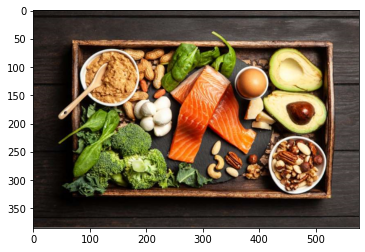

Zoomed original image


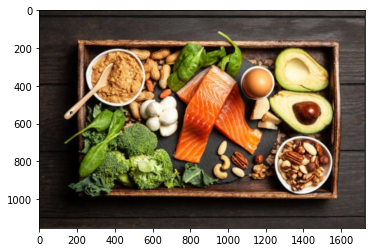

Grayscale Image:


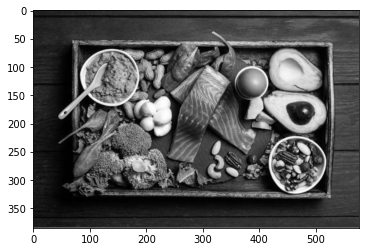

Zoomed grayscale image


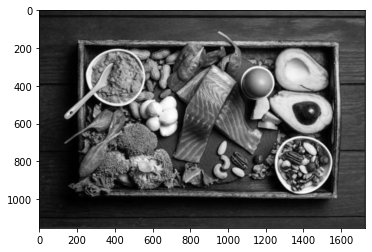

In [8]:
print("Original Image")
I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)
pixels = np.array(I1)
plt.imshow(pixels)
plt.show()


print("Zoomed original image")
# I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)

img_float32 = np.float32(I4)
lab_image = cv.cvtColor(img_float32, cv.COLOR_BGR2RGB)
pixels = np.array(lab_image)

plt.imshow(pixels)
plt.show()


print("Grayscale Image:")
pixels = np.array(I2)
plt.imshow(pixels, cmap='gray')
plt.show()

print("Zoomed grayscale image")

img_float32 = np.float32(I4)
lab_image = cv.cvtColor(img_float32, cv.COLOR_RGB2GRAY)
pixels = np.array(lab_image)

plt.imshow(pixels, cmap='gray')
plt.show()
